In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Preprocessed_dataset.csv")

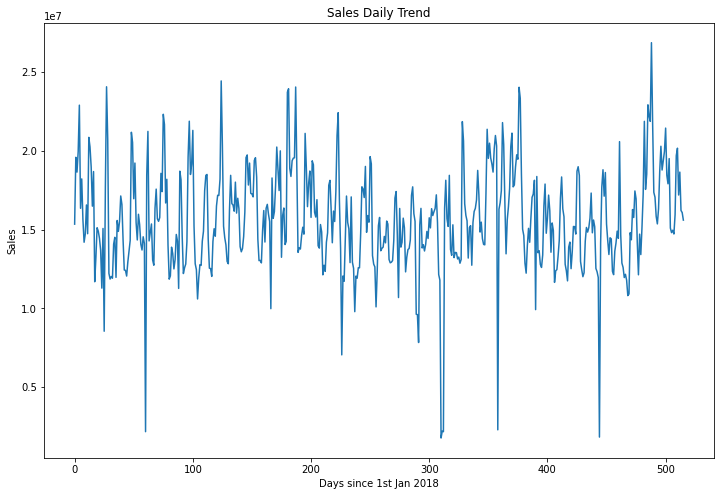

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Sales'])
plt.xlabel("Days since 1st Jan 2018")
plt.ylabel("Sales")
plt.title("Sales Daily Trend")
plt.savefig("Sales Daily Trend.png",bbox_inches='tight')
plt.show()

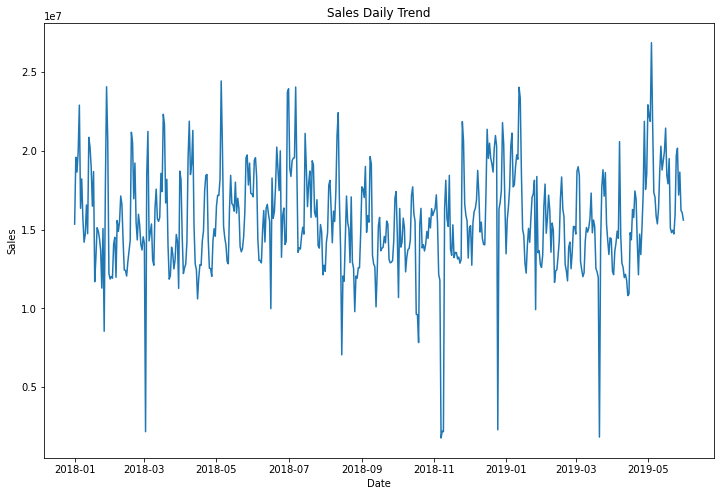

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
plt.figure(figsize=(12,8))
plt.plot(df['Date'],df['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Daily Trend")
plt.savefig("Sales Daily Trend.png",bbox_inches='tight')
plt.show()

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

### Use these diagnostics to determine lags going into DARTS models:

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

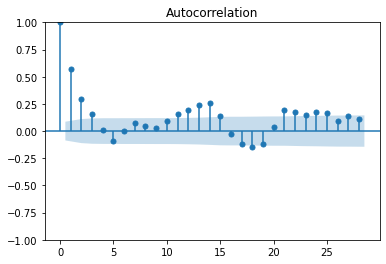

In [ ]:
plot_acf(df['Sales'])
plt.show()

Assumptions:
> Weak stationary — meaning no systematic change in the mean, variance, and no systematic fluctuation.

> Advisable to remove any trend present in the data and to make sure the data is stationary.

Autocorr plot shows there is seasonality since there is a pattern every ~10 days.             
. >5% (outside blue region) => Autocorr with lags of 1,2,3,11,12,13,14,15,18,21,22,23,24,25 days             
Hence, we could use any of these to predict the future

C:\Users\rohan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


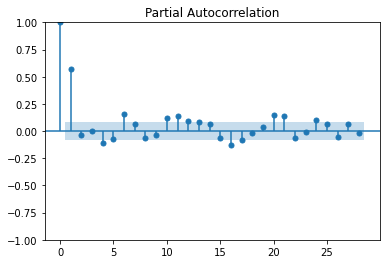

In [ ]:
plot_pacf(df['Sales'])
plt.show()

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

PAC plot shows that there is a correlation between upto 3 days of data, then again after 5 days.
Lags of 1,4,6,10,11,12,16,17,20,21,24 days have significant PAC          
Also useful in future prediction and NOT dependent on autocorrelation from other lags in between -> Could be better for prediction with less features

### Use this diagnostic when fitting Prophet model:

In [ ]:
import statsmodels.api as sm
def dickeyFullerPlot(data,lag=10):
    plt.figure(figsize=(12,8))
    p=sm.tsa.stattools.adfuller(data)[1]
    plt.title('Dickey-Fuller Plot, p='+str(p))
    plt.plot(data)
    plt.show()

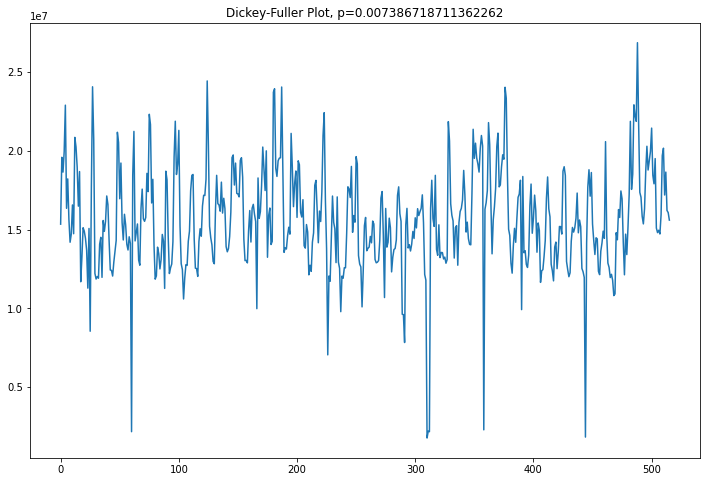

In [ ]:
dickeyFullerPlot(df['Sales'])

p value <5% -> data IS stationary                  
This means the time series is stationary -> Constant variance over time - No major seasonality

Mainly matters for classical approaches - model seasonality separately and the find the residuals (can be done better with stationary data). BUT for ML -> Need to try both because sometimes models can learn better or worse with seasonality.

Remove seasonality by taking the difference instead - Can take the 1st difference (predict how much my sales will increase/decrease by), or the 2nd difference (predict how much the increase or decerease in sales will be by - like 2nd derivative).

Difference can be taken based on lags identified above